In [2]:
## load data
import os
files = ["none.txt", "node.txt", "spec.txt", "both.txt"]
for fi, f in enumerate(files):
    file_path = os.path.join(os.getcwd(), "good_logs", f)
    lines = [line.split() for line in open(file_path, "r").readlines() if "average test" in line]
    files[fi] = (f, lines)

In [3]:
[one, two] = files[0][1][0:2]

assert (len(one) == len(two))
print(f"one: {one}")
print(f"two: {two}")

def parse_line(l):
    d = {}
    d["epoch"] = l[4]
    d["roc"] = float(l[-1])
    d["ap"] = float(l[-3])
    return d
parse_line(two)

one: ['average', 'test', 'of', 'epoch', '0:', 'loss', '0.48365', 'acc', '0.87995', 'auc', '0.91261', 'ap', '0.85516', 'roc', '0.91261']
two: ['average', 'test', 'of', 'epoch', '1:', 'loss', '0.34317', 'acc', '0.87968', 'auc', '0.91620', 'ap', '0.86994', 'roc', '0.91620']


{'epoch': '1:', 'roc': 0.9162, 'ap': 0.86994}

In [4]:
info = {}
for fn, lines in files:
    info[fn] = {}
    info[fn]["epoch_roc"] = 0
    info[fn]["epoch_ap"] = 0
    info[fn]["roc"] = 0
    info[fn]["ap"] = 0
    for l in lines:
        l = parse_line(l)
        if l["roc"] > info[fn]["roc"]:
            info[fn]["roc"] = l["roc"]
            info[fn]["epoch_roc"] = l["epoch"]
        if l["ap"] > info[fn]["ap"]:
            info[fn]["ap"] = l["ap"]
            info[fn]["epoch_ap"] = l["epoch"]    
info

{'none.txt': {'epoch_roc': '48:',
  'epoch_ap': '47:',
  'roc': 0.93602,
  'ap': 0.91605},
 'node.txt': {'epoch_roc': '43:',
  'epoch_ap': '48:',
  'roc': 0.92387,
  'ap': 0.90599},
 'spec.txt': {'epoch_roc': '10:',
  'epoch_ap': '42:',
  'roc': 0.93473,
  'ap': 0.91735},
 'both.txt': {'epoch_roc': '48:',
  'epoch_ap': '49:',
  'roc': 0.93384,
  'ap': 0.9205}}

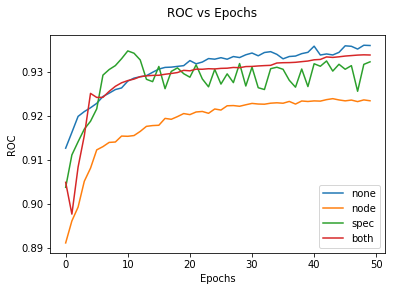

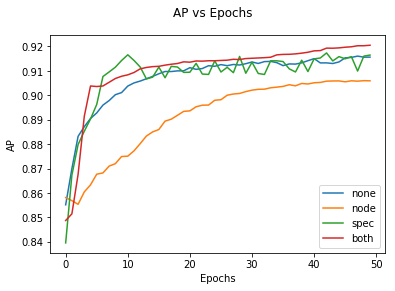

In [6]:
## plot
import matplotlib.pyplot as plt
lines = [[parse_line(l)for l in x[1]] for x in files ]

epochs = list(range(50))

#ROC
none = [d["roc"] for d in lines[0]]
node = [d["roc"] for d in lines[1]]
spec = [d["roc"] for d in lines[2]]
both = [d["roc"] for d in lines[3]]

plt.plot(epochs, none, label="none")
plt.plot(epochs, node, label="node")
plt.plot(epochs, spec, label="spec")
plt.plot(epochs, both, label="both")
plt.suptitle(f"ROC vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("ROC")
plt.legend()
plt.show()

#AP
none = [d["ap"] for d in lines[0]]
node = [d["ap"] for d in lines[1]]
spec = [d["ap"] for d in lines[2]]
both = [d["ap"] for d in lines[3]]

plt.plot(epochs, none, label="none")
plt.plot(epochs, node, label="node")
plt.plot(epochs, spec, label="spec")
plt.plot(epochs, both, label="both")
plt.suptitle(f"AP vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("AP")
plt.legend()
plt.show()